In [1]:
import numpy as np
from wgpu.gui.auto import WgpuCanvas
import pygfx as gfx
from fastplotlib import GridPlot, Line, Scatter

RFBOutputContext()


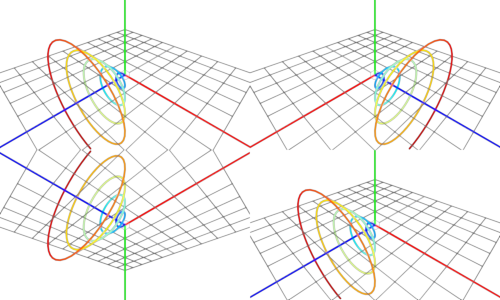

JupyterWgpuCanvas()

In [2]:
canvas = WgpuCanvas()
renderer = gfx.renderers.WgpuRenderer(canvas)

# grid with 2 rows and 2 columns
grid_shape = (2, 2)

# 3D view for all subplots within the grid
views = np.array(
    [
        ['3d', '3d'],
        ['3d', '3d']
    ]
)

# pan-zoom controllers for each view
# views are synced if they have the 
# same controller ID
# in this example the first view has its own controller
# and the last 3 views are synced
controllers = np.array(
    [
        [0, 1], # id each controller with an integer
        [1, 1]
    ]
)

# create the grid plot
grid_plot = GridPlot(
    canvas=canvas,
    renderer=renderer,
    grid_shape=grid_shape,
    views=views,
    controllers=controllers
)


# data that we will plot, just a spiral
phi = np.linspace(0, 30, 200)

xs = phi * np.cos(phi)
ys = phi * np.sin(phi)
zs = phi

# data must be 3d, with shape [<n_vertices>, 3]
spiral = np.dstack([xs, ys, zs])[0]

markers = list()
for i, subplot in enumerate(grid_plot):
    line = Line(data=spiral, size=2, cmap='jet')
    subplot.add_graphic(line)
    subplot.set_axes_visibility(True)
    subplot.set_grid_visibility(True)
    
    # invert the camera for some views to get
    # different perspectives on the same data
    if i == 1:
        subplot.camera.scale.x = -1
    if i == 2:
        subplot.camera.scale.y = -1
    
    # just a ball that can move on the spiral
    marker = Scatter(data=spiral[0], size=10)
    subplot.add_graphic(marker)
    markers.append(marker)
    
marker_index = 0

# a function to move the ball along the spiral
def move_marker():
    global marker_index
    global markers
    
    marker_index += 1
    
    if marker_index == spiral.shape[0]:
        marker_index = 0
    
    new_markers = list()
    for subplot, marker in zip(grid_plot, markers):
        subplot.remove_graphic(marker)
        new_marker = Scatter(data=spiral[marker_index])
        new_markers.append(new_marker)
        subplot.add_graphic(new_marker)
        
    markers = new_markers

# add `move_marker` to the animations
grid_plot.add_animations([move_marker])
    
canvas.request_draw(grid_plot.animate)
canvas